In [1]:
from DAVE.scene import *
from DAVE.jupyter import *

from DAVE.marine import *

default resource folders:
C:\Users\beneden/models
C:\data\vf\virtual-float\src\virtualfloat/resources


In [2]:
s = Scene()

# code for Barge
s.new_rigidbody(name='Barge',
                mass=20000.0,
                cog=(5,0.0,0.0),
                fixed =(True, True, False, False, False, True) )
# code for Buoyancy mesh
s.new_buoyancy(name='Buoyancy mesh',
          parent='Barge')
s['Buoyancy mesh'].trimesh.load_obj(s.get_resource_path('cube.obj'), scale = (100.0,30.0,12.0), rotation = (0.0,0.0,0.0), offset = (0.0,0.0,0.0))
# code for Liftme
s.new_rigidbody(name='Liftme',
                mass=1000.0, fixed = False )
# code for Poi
s.new_poi(name='Poi',
          parent='Liftme',
          position=(-3.0,
                    0.0,
                    0.0))
# code for Crane_slew
s.new_axis(name='Crane_slew',
           parent='Barge',
           position=(-47.0,
                     0.0,
                     6.0),
           rotation=(0.0,
                     0.0,
                     180.0),
           fixed =(True, True, True, True, True, True) )
# code for Crane
s.new_rigidbody(name='Crane',
                mass=0.0,
                cog=(23.0,
                     0.0,
                     0.0),
                parent='Crane_slew',
                position=(0.0,
                          0.0,
                          0.0),
                rotation=(0.0,
                          -50.0,
                          0.0),
                fixed = True )
# code for Susp. point
s.new_poi(name='Susp. point',
          parent='Crane',
          position=(60.0,
                    0.0,
                    -3.0))
# code for Cable
s.new_cable(name='Cable',
            poiA='Poi',
            poiB='Susp. point',
            length=40.947,
            EA=100000.0)
# code for Cabin
s.new_rigidbody(name='Cabin',
                mass=500.0,
                cog=(0.0,
                     0.0,
                     0.0),
                parent='Barge',
                position=(33.0,
                          8.0,
                          9.0),

                fixed = True )


# code for Visual
s.new_visual(name='Visual',
            parent='Crane',
            path='crane_boom.obj',
            offset=(0, 0, 0),
            rotation=(0.0, 0.0, 0.0),
            scale=(0.8, 3.0, 1.0) )
# code for Visual_1
s.new_visual(name='Visual_1',
            parent='Cabin',
            path='cube.obj',
            offset=(0, 0, 0),
            rotation=(0, 0, 0),
            scale=(13.0, 13.0, 5.0) )

Solved to 0.00023536106049627974.


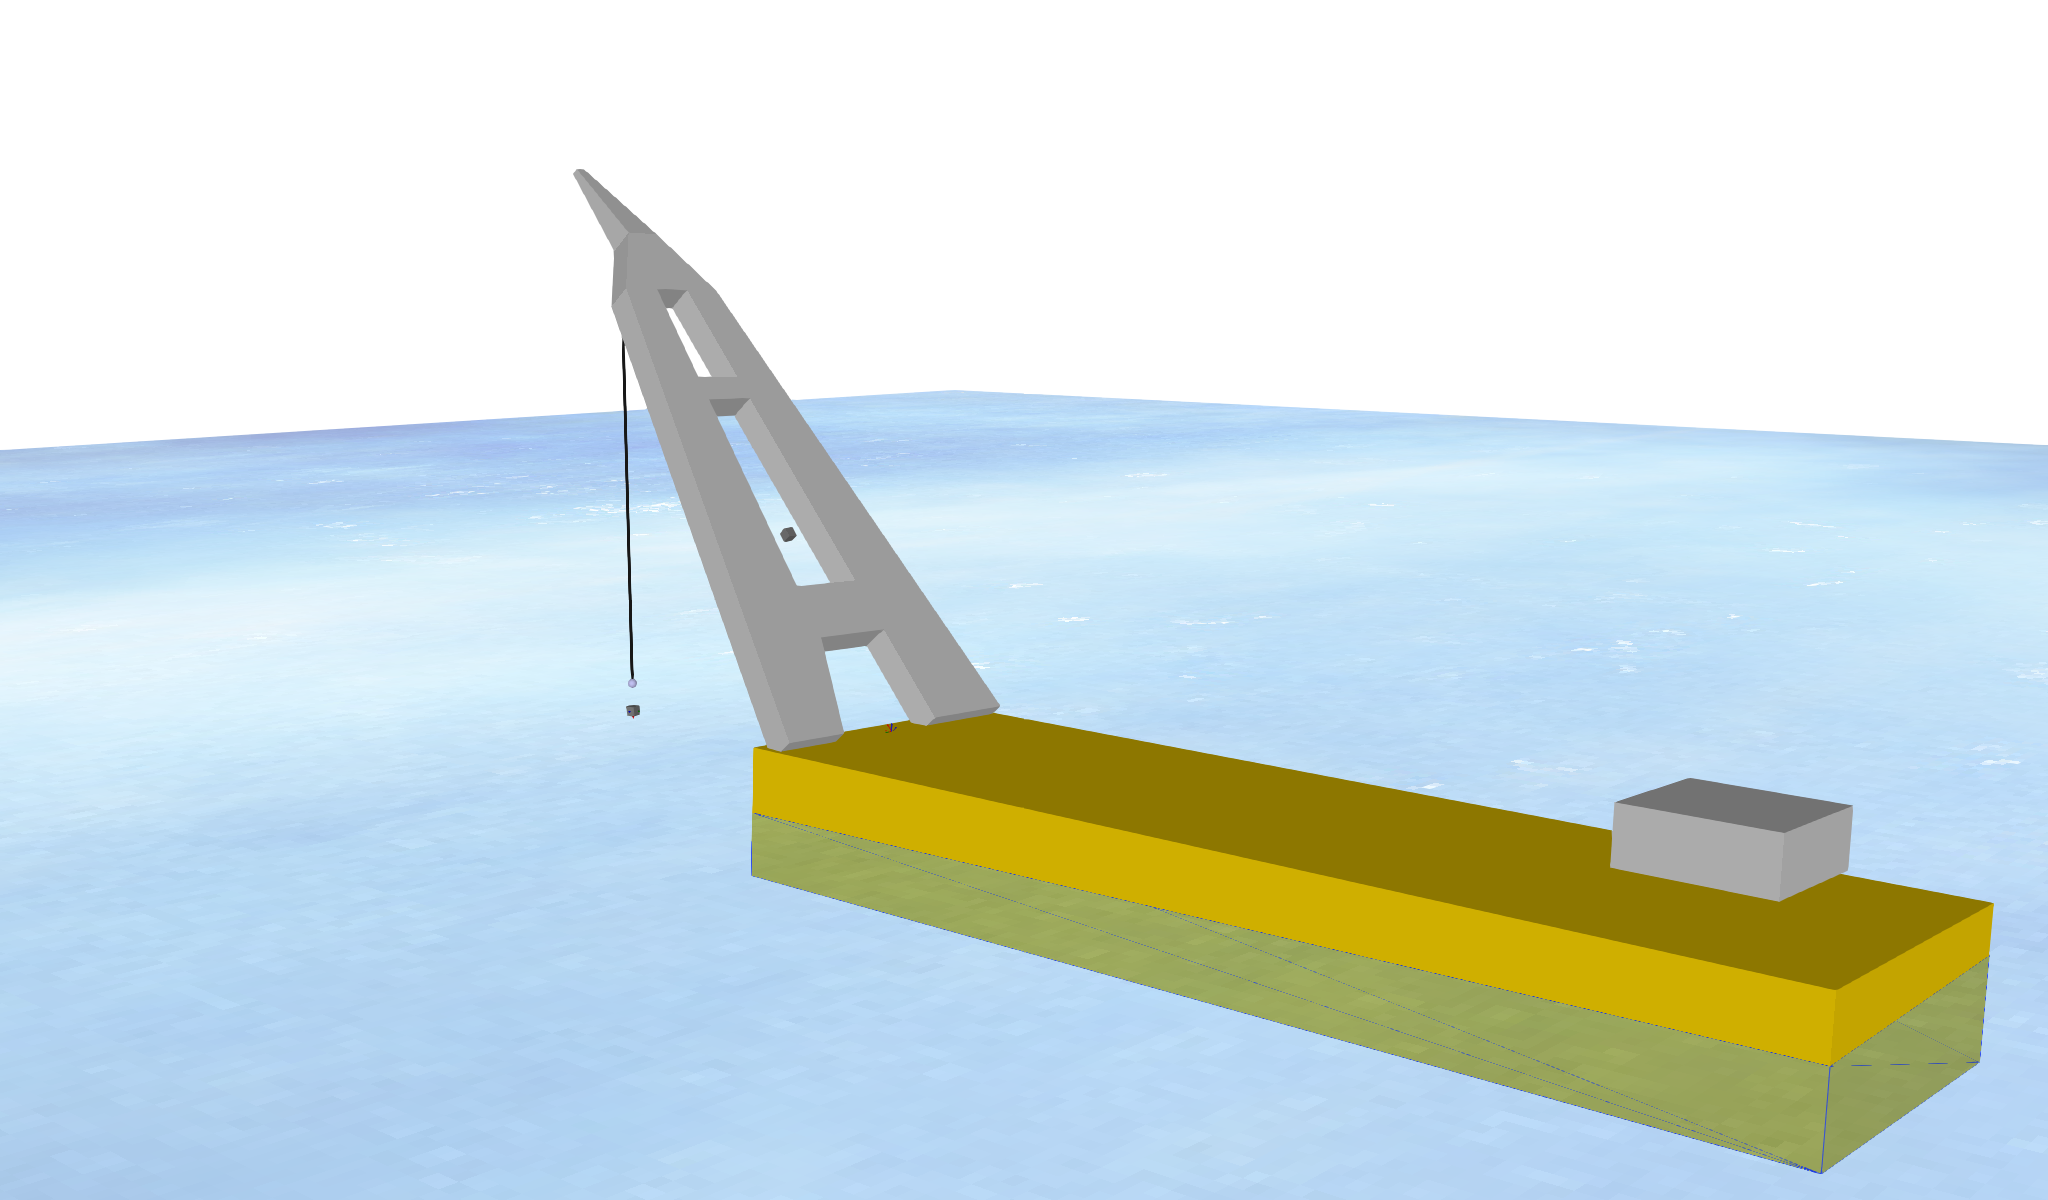

In [10]:
s.solve_statics()
screenshot(s,camera_pos = (100,-150,50), lookat=(-30,0,20))

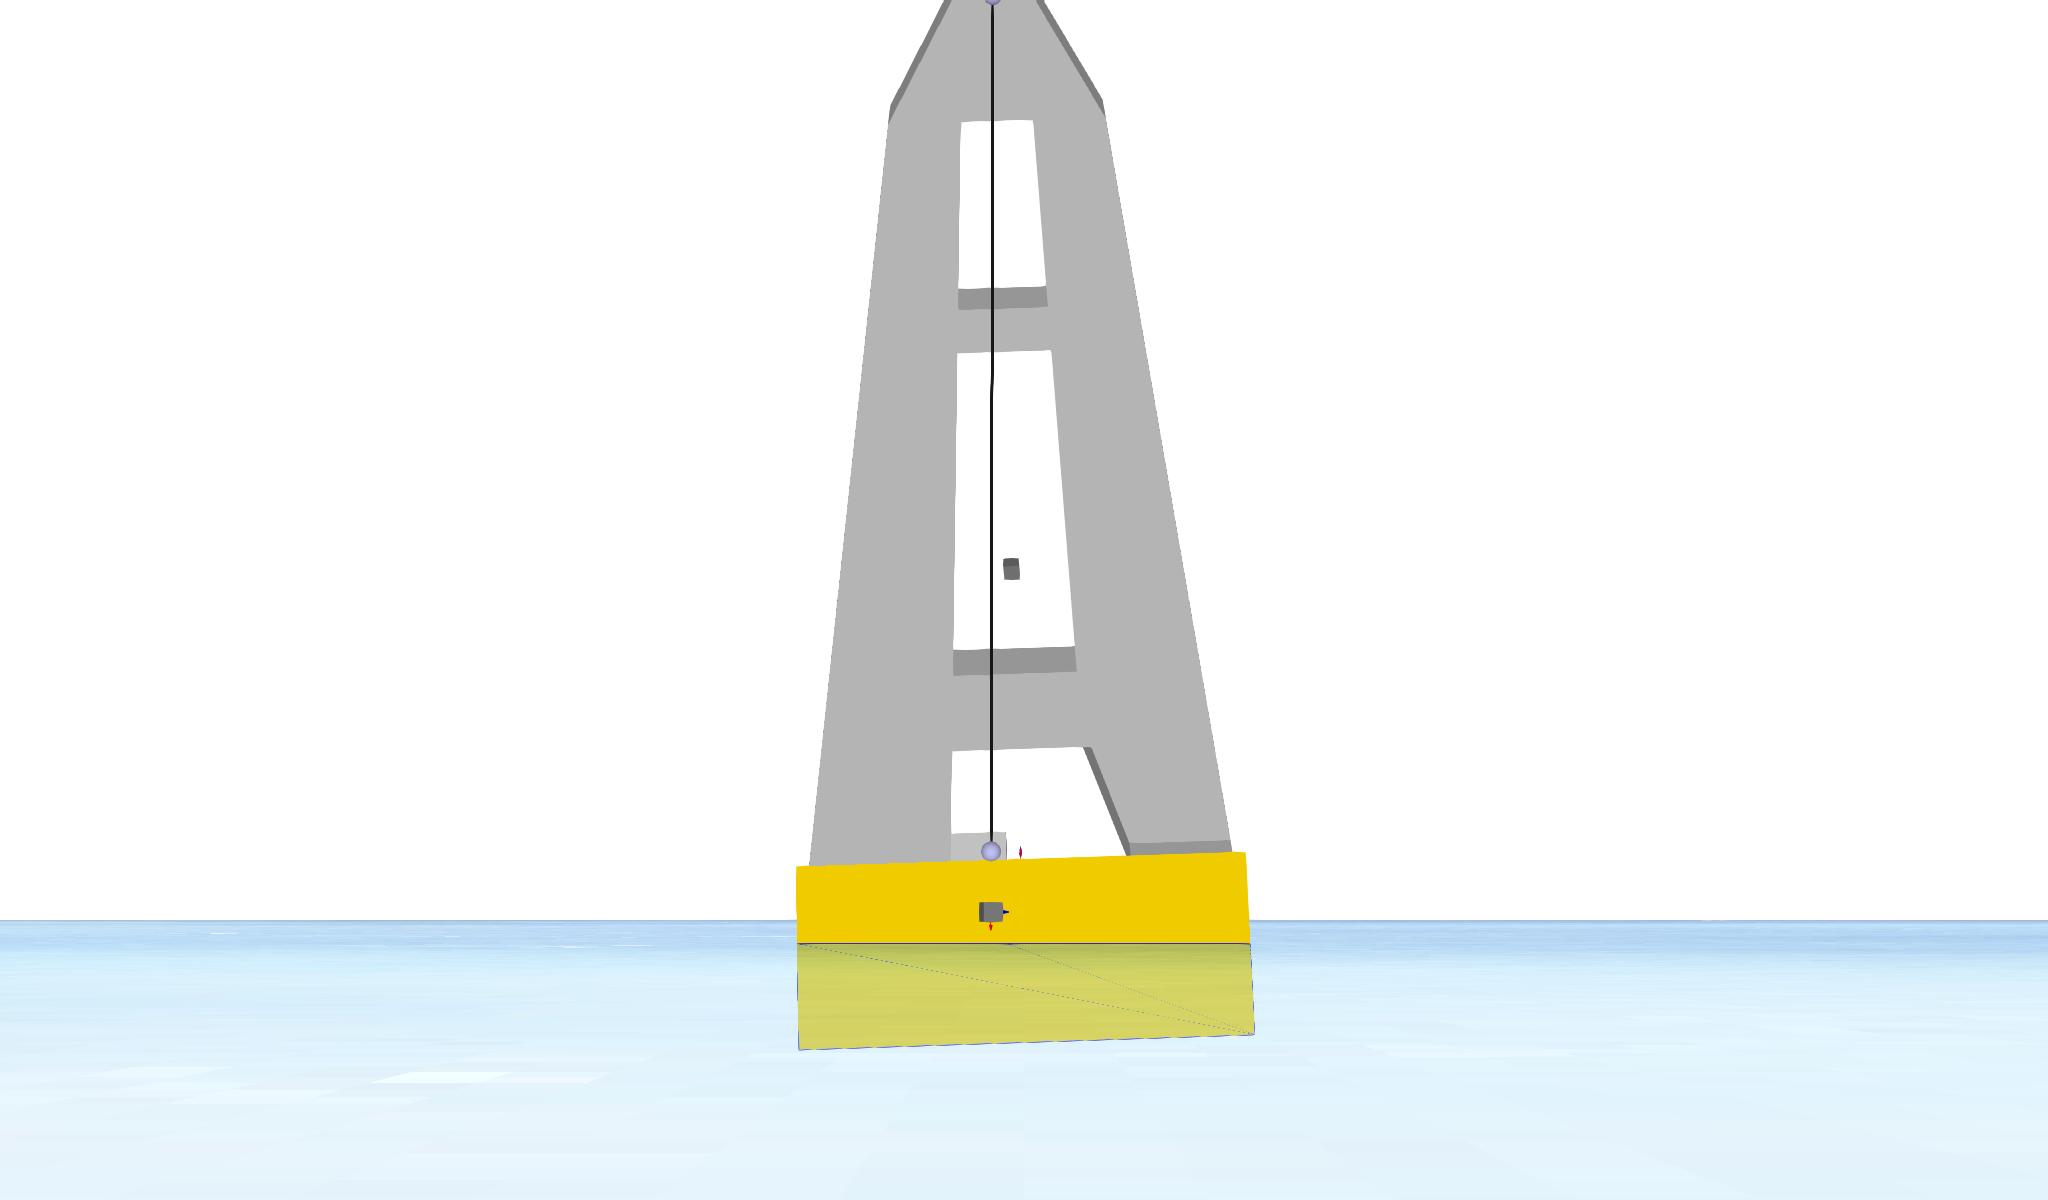

In [14]:
screenshot(s, camera_pos = (-200,0,2), lookat = (0,0,30))

C:\data\vf\virtual-float\src\virtualfloat\scene.py:2096: RuntimeWarning: invalid value encountered in greater
  if np.any(np.abs(d)>2000):


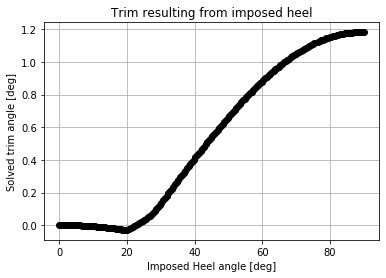

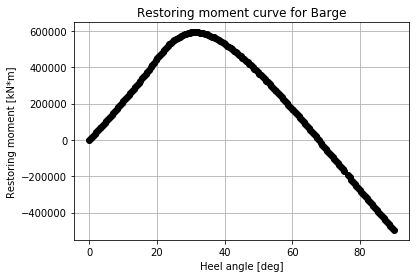

In [16]:
GZcurve_DisplacementDriven(s, 'Barge')